In [36]:
using SparseArrays, LinearAlgebra
#using Pkg
#Pkg.activate("../")
using Causality

# Generation of Epidemics

In [37]:
T, N = 30.0, 100
#G = Causality.makeBarabasi(N,k=1)
#ρ = 3/N
#G = Causality.makeGNP(N,ρ)
G = Causality.makeProximity(N,3.5/N)
G.A 

100×100 SparseMatrixCSC{IndexedGraphs.NullNumber, Int64} with 1002 stored entries:
⠀⠄⠀⠄⢈⠆⠐⠐⠒⠂⠤⠄⠀⠄⠄⡈⠀⠀⠄⠢⠀⢁⠔⠀⠠⢈⠄⠀⠠⠄⠀⠄⡁⠄⠀⠄⠀⠠⠤⠠
⠀⠄⠀⠀⠄⠂⠄⠂⠀⠑⠐⡄⠀⠊⠊⠀⠀⠂⠄⠱⠡⠀⠐⠀⠢⠀⠖⠈⠠⢄⡐⠀⢠⠔⢈⠤⠑⡠⢢⡐
⠢⠔⠠⠁⡀⠈⠠⡥⠤⠤⠡⠉⠈⡄⠤⠂⡠⢄⠁⠄⢈⠐⠤⡀⠤⠐⠠⠀⠁⠀⢨⠀⠂⠁⠀⢈⢨⠀⠄⠠
⢐⠀⠠⠁⠄⡦⢀⠐⡒⡂⠠⠀⠄⠄⠄⠀⠄⠠⠀⠢⡠⠀⠰⢄⢄⠀⢄⠄⠄⠀⠠⠀⠨⠠⠈⠡⠠⠉⠀⠠
⠸⠀⢄⠀⠀⡇⠸⠨⠮⠃⠀⠀⠀⠠⢀⠀⠀⡀⠀⠇⠅⠀⠰⢀⣈⠀⢀⢠⠀⠀⠀⠀⢀⠀⠠⠀⢄⠀⠀⠀
⠀⠇⠐⠤⡅⠂⠀⠂⠀⠀⠄⠁⢀⠆⠆⡀⠁⠀⢅⠐⠸⠀⠅⡀⠺⠁⠂⠀⣀⠄⢔⠍⠀⠄⠀⠮⢀⠀⠶⠐
⠀⠄⡠⠀⠂⠤⠀⠅⠀⡀⠠⠔⠀⠀⠄⠀⠠⠤⠀⡀⡀⠀⠌⠌⠡⠀⠈⠁⠒⠀⠘⠀⠈⠊⢀⠐⡈⠀⠄⠠
⡀⠡⠊⠀⠠⠃⠀⠁⠀⠐⠈⠡⠀⠁⠀⠀⠐⠣⠠⠊⠂⡠⠁⠄⠉⣠⠑⠐⠠⠀⠨⢀⠄⠀⠀⠀⠢⠀⠁⠈
⠀⠀⠠⠀⠀⢎⠀⡁⠀⠠⠁⠀⠀⡆⠴⡀⠠⠂⠀⠄⠈⠀⠆⡀⠔⠃⠠⠠⢀⠀⠀⠋⠀⠀⠀⠀⢠⠀⠆⠠
⠠⡁⢄⡁⠁⠄⠠⡀⠤⠄⢁⠑⠀⠠⡠⠂⠀⠄⠀⠀⢌⠀⠡⠂⠈⠀⡀⠠⠘⡁⠀⠁⠀⠁⠠⡉⠄⢀⢈⢀
⠄⢀⠁⠂⢂⠐⠀⠊⠁⠁⠒⠂⠀⠈⠈⡠⠂⠀⠂⠑⠀⠀⠐⠀⠈⢠⠂⠊⠀⠀⠐⠂⡀⠂⠈⠐⠁⠀⠐⠀
⠐⠁⠐⠀⠀⠣⠐⢆⠐⢂⠁⠡⡂⠅⠁⠄⠈⠡⠡⠂⠐⠀⢀⠐⣊⠀⢐⠂⠠⠀⢰⠁⢐⢐⡀⠀⢠⠀⠁⠈
⡀⢂⠈⠂⢀⠃⠀⠑⠂⠘⠞⠂⠁⠂⠃⣠⠴⠁⠂⠀⠂⣀⠊⠘⠀⠀⠘⠑⠀⠀⠈⠦⡘⠈⠀⠀⠚⠀⠂⠘
⠀⠁⡘⠁⠀⠂⠀⠕⠀⣐⠈⠀⠆⠀⢑⠀⠀⡂⠀⡈⡨⠀⠰⠐⢖⠀⢠⠒⠀⠁⠠⠀⠐⠰⠀⠁⣐⠈⠨⠈
⠀⠆⠀⢆⠁⠀⠀⠁⠀⠀⠀⠜⠘⠀⠀⠂⠀⠐⠖⠠⠀⠀⠀⠂⠀⠀⠄⠀⠪⠂⡘⠀⢀⠇⢀⠞⠘⡰⢰⡀
⠀⠄⠐⠈⠂⠒⠀⠂⠀⠀⡔⠕⠒⠀⠂⢂⡤⠀⠄⠀⠰⠀⠔⠒⠢⡄⠀⠂⠒⠈⠀⡠⠘⠐⠈⠐⠐⠁⠈⠑
⠁⠌⢀⠖⠌⠀⠂⡂⠀⠐⠀⠄⡢⠀⠀⠁⠀⠀⠄⠀⠠⠈⢐⢐⡒⠈⢐⡀⠤⠔⢒⠀⢀⠐⠒⠤⢐⠒⠠⠂
⠀⠄⠂⡔⡀⢀⠆⡀⠀⠂⡠⡄⢀⠐⠀⠀⠀⠀⡄⠢⢂⠀⠀⠈⠀⠀⠄⠀⣠⠔⢂⠀⠘⡄⠀⠀⢂⠢⠠⠂
⠀⡀⠑⡠⠂⠒⡄⠂⠀⠑⠀⠐⠂⠈⠈⠂⠀⠒⠀⢁⠁⠀⠀⠒⠚⠀⡐⠘⢒⡠⠔⠀⢰⠐⠨⡐⠀⠀⢀⠔
⠀⡃⢈⠲⠀⡁⠀⡀⠀⠀⢘⠃⠀⡁⡁⠀⠈⡁⠂⢐⠐⠀⡁⠀⣈⠀⡂⠂⠐⠲⢆⠀⠠⠂⠠⠂⢀⠔⡀⠈

In [38]:
getpar(pseed,autoinf::GaussianRate,inf_in::GaussianRate) = 
    [fill(pseed, 1, N);
     fill(autoinf.a, 1, N); fill(autoinf.b, 1, N); fill(autoinf.c, 1, N);
     fill(inf_in.a,   1, N); fill(inf_in.b, 1, N); fill(inf_in.c, 1, N);
    ]

getpargen(pseed, autoinf::GaussianRate, inf_out::GaussianRate) = 
    [pseed autoinf.a autoinf.b autoinf.c inf_out.a inf_out.b inf_out.c]


getpargen (generic function with 1 method)

In [67]:
#Initialize generation parameters
ε = 1e-10
λ = 0.2
pseed = 1/N
autoinf = GaussianRate(ε, T/2, 1/ε)
inf_in = GaussianRate(1.0, T/2, 1/ε)
inf_out = GaussianRate(λ, 3., 2.)

θp = getpar(pseed, autoinf, inf_in);
θpgen = getpargen(pseed, autoinf, inf_out);

In [68]:
#Initialize min/max boundaies
T = Float64(T)
pseed_min = ε
pseed_max = 1-ε
rate_min = GaussianRate(ε  ,  -T,   ε)
rate_max = GaussianRate(1/ε  ,  2T,   1/ε)

θmin = getpar(pseed_min , rate_min, rate_min);
θmax = getpar(pseed_max , rate_max, rate_max);

rate_min = GaussianRate(ε  ,  -T,   ε)
rate_max = GaussianRate(1/ε  ,  T,   T)

θgenmin = getpargen(pseed_min, rate_min, rate_min);
θgenmax = getpargen(pseed_max, rate_max, rate_max);

In [69]:
const Igen = GenerativeSI{GaussianRate,GaussianRate} 
const Igauss = GaussianInferentialSI

GaussianInferentialSI

In [70]:
Mp = StochasticModel(Igen, T, θp, G, θpgen);
sample! = Sampler(Mp);

xtrue = zeros(N)
sample!(xtrue)
nobs, p = Int(round(N/30)), 1e-5
#nobs, p = N, 1e-5
O = [(ti = T*(1+rand())/2; (i,xtrue[i] < ti,ti,p)) for i=1:nobs]
sum(xtrue .< T)

89

## Causality 

In [71]:
#Softened model
T = Float64(T)
ε = 2e-3
autoinf = GaussianRate(ε, T/2, T);
θp2gen = getpargen(pseed, autoinf, inf_out);
inf_in = GaussianRate(1., T/2, 3*T );

θp2 = getpar(pseed, autoinf, inf_in);
Mp2 = StochasticModel(Igen, T, θp2, G, θp2gen);

In [73]:
θ = getpar(pseed, autoinf, inf_in);
M = StochasticModel(Igauss, T, θ, G, θp2gen);

In [74]:
using ProgressMeter
ProgressMeter.ijulia_behavior(:clear)
F = descend!(Mp2, O; M=M, numsamples=1000, numiters=100, 
         θmin=θmin, θmax=θmax,θgenmin=θgenmin, θgenmax=θgenmax, descender=SignDescender(0.1),
         hyperdescender=SignDescender(0.));
F = descend!(Mp2, O; M=M, numsamples=1000, numiters=100, 
         θmin=θmin, θmax=θmax,θgenmin=θgenmin, θgenmax=θgenmax, descender=SignDescender(0.03),
         hyperdescender=SignDescender(0.));
F

Progress:  79%|████████████████████████████████▍        |  ETA: 0:00:09
  F:  4.997719091143761

LoadError: TaskFailedException

[91m    nested task error: [39mInterruptException:
    Stacktrace:
     [1] [0m[1mgradient![22m[0m[1m([22m[90mresult[39m::[0mSubArray[90m{Float64, 1, Matrix{Float64}, Tuple{Base.Slice{Base.OneTo{Int64}}, Int64}, true}[39m, [90mf[39m::[0mCausality.var"#55#56"[90m{Matrix{Float64}, StochasticModel{GaussianInferentialSI, IndexedGraphs.IndexedBiDiGraph{Int64}, Vector{UnitRate}}, Int64}[39m, [90mx[39m::[0mSubArray[90m{Float64, 1, Matrix{Float64}, Tuple{Base.Slice{Base.OneTo{Int64}}, Int64}, true}[39m[0m[1m)[22m
    [90m   @ [39m[35mForwardDiff[39m [90m~/.julia/packages/ForwardDiff/PBzup/src/[39m[90m[4mgradient.jl:35[24m[39m
     [2] [0m[1mgradient![22m[0m[1m([22m[90mdθ[39m::[0mMatrix[90m{Float64}[39m, [90mx[39m::[0mMatrix[90m{Float64}[39m, [90mM[39m::[0mStochasticModel[90m{GaussianInferentialSI, IndexedGraphs.IndexedBiDiGraph{Int64}, Vector{UnitRate}}[39m[0m[1m)[22m
    [90m   @ [39m[36mCausality[39m [90m~/git/Causality/src/[39m[90m[4mvariation.jl:162[24m[39m
     [3] [0m[1mmacro expansion[22m
    [90m   @ [39m[90m~/git/Causality/src/[39m[90m[4mvariation.jl:55[24m[39m[90m [inlined][39m
     [4] [0m[1m(::Causality.var"#95#threadsfor_fun#29"{StochasticModel{GaussianInferentialSI, IndexedGraphs.IndexedBiDiGraph{Int64}, Vector{UnitRate}}, Int64, StochasticModel{GenerativeSI{GaussianRate, GaussianRate}, IndexedGraphs.IndexedBiDiGraph{Int64}, Vector{UnitRate}}, Vector{Tuple{Int64, Bool, Float64, Float64}}, Matrix{Float64}, Vector{Causality.var"#sample!#66"{StochasticModel{GaussianInferentialSI, IndexedGraphs.IndexedBiDiGraph{Int64}, Vector{UnitRate}}, TrackingHeaps.TrackingHeap{Int64, Float64, 2, TrackingHeaps.MinHeapOrder, TrackingHeaps.NoTrainingWheels}, BitVector, Int64}}, Vector{Float64}, Vector{Vector{Tuple{Int64, Bool, Float64, Float64}}}, Vector{Matrix{Float64}}, Vector{Matrix{Float64}}, Vector{Matrix{Float64}}, Vector{Matrix{Float64}}, Vector{Matrix{Float64}}, Vector{Float64}, Int64, UnitRange{Int64}})[22m[0m[1m([22m[90monethread[39m::[0mBool[0m[1m)[22m
    [90m   @ [39m[36mCausality[39m [90m./[39m[90m[4mthreadingconstructs.jl:85[24m[39m
     [5] [0m[1m(::Causality.var"#95#threadsfor_fun#29"{StochasticModel{GaussianInferentialSI, IndexedGraphs.IndexedBiDiGraph{Int64}, Vector{UnitRate}}, Int64, StochasticModel{GenerativeSI{GaussianRate, GaussianRate}, IndexedGraphs.IndexedBiDiGraph{Int64}, Vector{UnitRate}}, Vector{Tuple{Int64, Bool, Float64, Float64}}, Matrix{Float64}, Vector{Causality.var"#sample!#66"{StochasticModel{GaussianInferentialSI, IndexedGraphs.IndexedBiDiGraph{Int64}, Vector{UnitRate}}, TrackingHeaps.TrackingHeap{Int64, Float64, 2, TrackingHeaps.MinHeapOrder, TrackingHeaps.NoTrainingWheels}, BitVector, Int64}}, Vector{Float64}, Vector{Vector{Tuple{Int64, Bool, Float64, Float64}}}, Vector{Matrix{Float64}}, Vector{Matrix{Float64}}, Vector{Matrix{Float64}}, Vector{Matrix{Float64}}, Vector{Matrix{Float64}}, Vector{Float64}, Int64, UnitRange{Int64}})[22m[0m[1m([22m[0m[1m)[22m
    [90m   @ [39m[36mCausality[39m [90m./[39m[90m[4mthreadingconstructs.jl:52[24m[39m

In [75]:
statscau = prior(M, numsamples=10000);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


## SoftMarg

In [76]:
stats = softpost(Mp, O; numsamples=10^5);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:31


23038×100 Matrix{Float64}:
 30.0      9.26166   3.79849   5.52512  …   6.4284    8.12904   4.71031
 30.0     11.8829    1.82594   2.34358      0.97273   6.04307   4.44314
 30.0     11.6804    2.98529   4.03778      4.38027   9.56708   6.37415
 30.0      8.44662   3.49522   3.30819      3.98535   6.03907   2.86521
 30.0      2.56815   8.49491   6.55324      7.75908  21.7781    5.19218
 30.0      7.11298   3.53185   2.22293  …   1.93701   6.37364   2.59088
 30.0     13.2832    4.57659   3.43498      2.77926   7.70341   6.37485
 30.0     13.8577    4.39498   6.46158      7.91979  12.9849    4.86689
 30.0      8.53682   1.41898   0.0          3.62801   1.42463   3.21832
 30.0      8.98974   2.7249    0.0          5.11617   8.89462   2.59928
 30.0      9.79176   4.75556   3.89709  …   5.41174  10.77      5.64893
 30.0      6.82477   3.92525   6.14409      6.7236   15.208     5.70001
 30.0     12.0202    5.68579   5.74887      5.86392  11.8691    4.43079
  ⋮                                  

## Sib

In [77]:
using PyCall
@pyimport sib
function NonMarkovSibyl(N, T_cont, Λ, a, b, c, O, γ; dt=1/5, maxit = 400, tol = 1e-14)
    
    T = Int(round(T_cont / dt))
    contacts = [(i-1,j-1,t, 1) for t in 1:T for (i,j,v) in zip(findnz(Λ.A)...)];
    obs = [[(i,-1,t) for t=1:T for i=0:N-1];
           [(i-1,s,Int(round(t/dt))) for (i,s,t,p) in O]]
    sort!(obs, lt=((i1,s1,t1),(i2,s2,t2))->(t1<t2))
    prob_sus = 0.5
    prob_seed=γ
    pseed = prob_seed / (2 - prob_seed)
    psus = prob_sus * (1 - pseed)
    g = sib.PiecewiseLinear(pycall(sib.RealParams, PyObject, [a*exp(-((t-b)/c)^2) * dt for t =1:T]))
    params = sib.Params(prob_r=sib.Exponential(mu=0), pseed=pseed, psus=psus,pautoinf=1e-10,fp_rate=1e-10,fn_rate=1e-10, prob_i = g)
    f = sib.FactorGraph(contacts=contacts, observations=obs, params=params)
    sib.iterate(f, maxit=maxit,tol=tol)
    sib.iterate(f, maxit=maxit, damping=0.5, tol=tol)
    sib.iterate(f, maxit=maxit, damping=0.9, tol=tol)
    p_sib=[collect(n.bt) for n in f.nodes]
    m_sib = zeros(N, T)
    for i=1:N
        m_sib[i,1] = p_sib[i][1] 
        for t=2:T
            m_sib[i,t] = m_sib[i,t-1] + p_sib[i][t]
        end
    end 
    return m_sib
end

NonMarkovSibyl (generic function with 1 method)

In [86]:
a=time()
dt = 1/2
p_sib = NonMarkovSibyl(N, T, G, inf_out.a, inf_out.b, inf_out.c, O, 1/N; dt=dt, maxit = 40, tol = 1e-7);
b=time()
println(b-a)


sib.iterate(damp=0.0): 39/40 1.150e-06/1e-07      
sib.iterate(damp=0.5): 9/40 6.268e-08/1e-07      
14.958379983901978.9): 0/40 4.955e-08/1e-07      


# Heuristic

In [79]:
using IntervalUnionArithmetic
T = Float64(T)
struct HeuristicSI <: SI end
maskauto = fill(IntervalUnion(0., T),N)
maskinf = fill(IntervalUnion(0., T),N)
θfrench = getpar(pseed, GaussianRate(1e-10,T,T), inf_in);
Causality.individual(M::StochasticModel{HeuristicSI}, i::Int, θi = @view(M.θ[:,i]), θg = M.θgen ) = 
@views IndividualSI(θi[1], 
    MaskedRate(GaussianRate(θi[2:4]...),maskauto[i]), 
    MaskedRate(UnitRate(),maskinf[i]), 
    GaussianRate(θg[5:7]...),)


for o in O
    if o[2] == 1 
        maskauto[o[1]] = maskauto[o[1]] ∩ IntervalUnion(o[3]-5, T)        
        θfrench[2,o[1]] = 10
        θfrench[3,o[1]] = o[3] - 5
        θfrench[4,o[1]] = 10
    elseif o[2] == 0
        maskinf[o[1]] = maskinf[o[1]] ∩ IntervalUnion(o[3], T)
        θfrench[1,o[1]] = 1e-10
    end
end

Mfrench = StochasticModel(HeuristicSI, T, θfrench, G, θp2gen);
statsfre = prior(Mfrench,numsamples=10000);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:03


## Metropolis Monte Carlo

In [80]:
K = Causality.GaussMove(2.)
#stats_mh = Causality.metropolis_sampling_parallel(Mp, O, K; numsamples = 10^3,numsteps=10^3)
stats_mh = Causality.metropolis_sampling_sequential(Mp, O, K; numsamples = 10^3,numsteps=10^3);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:27
  acc_ratio:  0.397


## Marginals and ROC curve

In [81]:
function marginal(i, t, stats)
    numsamp = size(stats,1)
    sum(stats[:,i] .< t)/numsamp
end

function tpr(xtrue, rank) 
    cumsum(xtrue[rank]) ./( cumsum(xtrue[rank])[end])
end

function fpr(xtrue, rank) 
    N = size(rank,1)
    return (range(1,N,length=N) .- cumsum(xtrue[rank])) ./ (range(1,N,length=N) .- cumsum(xtrue[rank]) )[end]
end

function ROC(xtrue, p)
    N = size(xtrue,1)
    rank = sortperm(p, rev=true)
    
    return fpr(xtrue, rank) , tpr(xtrue, rank)
end

function AUROC(ROC)
    N = size(ROC[1],1) 
    AU = 0
    for t = 1:N-1
        AU += ROC[2][t] * (ROC[1][t+1] - ROC[1][t])
    end
    return AU
end

AUROC (generic function with 1 method)

In [82]:
O

3-element Vector{Tuple{Int64, Bool, Float64, Float64}}:
 (1, 0, 19.786538042025747, 1.0e-5)
 (2, 1, 16.12197504877565, 1.0e-5)
 (3, 1, 18.413482317284238, 1.0e-5)

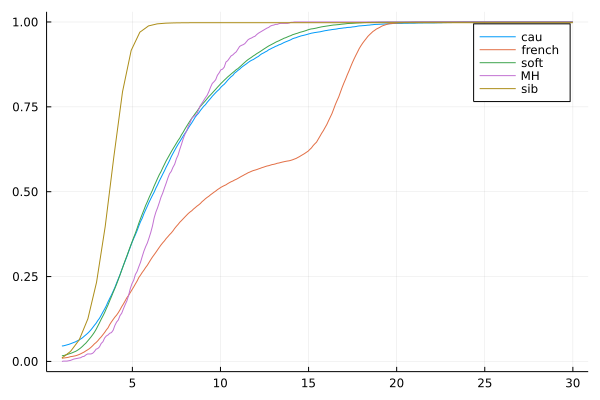

In [87]:
#Marginals
bins = 10 * Int(T)
using Plots
p_cau = zeros(N,bins)
p_french = zeros(N,bins)
p_mh = zeros(N,bins)
p_soft = zeros(N,bins)
for i = 1:N
    for t = 1:bins
       p_cau[i,t] = marginal(i, t*T/bins, statscau)
       p_french[i,t] = marginal(i, t*T/bins, statsfre)
       p_mh[i,t] = marginal(i, t*T/bins, stats_mh)
       p_soft[i,t] = marginal(i, t*T/bins, stats)
    end
end
i = 4
plot(LinRange(1,Int(T),bins),p_cau[i,:], label = "cau")
plot!(LinRange(1,Int(T),bins),p_french[i,:], label = "french")
plot!(LinRange(1,Int(T),bins),p_soft[i,:], label = "soft")
plot!(LinRange(1,Int(T),bins),p_mh[i,:], label = "MH")
plot!(LinRange(1,Int(T),Int(round(T/dt))),p_sib[i,:], label = "sib")

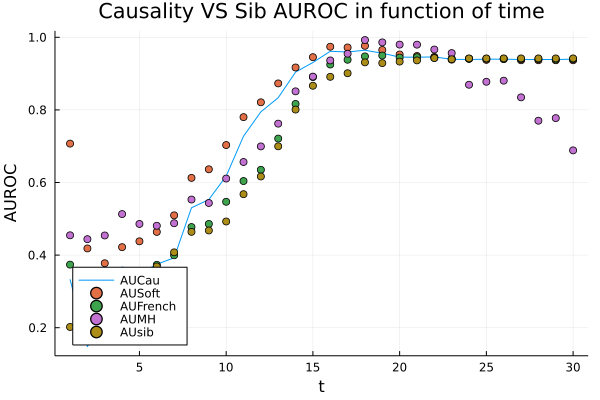

In [89]:
#AUROC curves

T = Int(T)
AU_curve=zeros(T)
AU_sib=zeros(T)
AU_french = zeros(T)
AU_soft = zeros(T)
AU_MH = zeros(T)
for t = 1:T
    cau_risk=zeros(N)
    sib_risk = zeros(N)
    french_risk = zeros(N)
    MH_risk = zeros(N)
    soft_risk = zeros(N)
    for i=1:N
       cau_risk[i] = marginal(i,t,statscau)
       french_risk[i] = marginal(i,t,statsfre)
       MH_risk[i] = marginal(i,t,stats_mh)
       sib_risk[i] = p_sib[i,Int(round(t/dt))]
       soft_risk[i] = marginal(i,t,stats) 
    end
    xt = xtrue .< t
    AU_soft[t] = AUROC(ROC(xt, soft_risk))
    AU_curve[t] = AUROC(ROC(xt, cau_risk))
    AU_french[t] = AUROC(ROC(xt, french_risk))
    AU_MH[t] = AUROC(ROC(xt, MH_risk))
    AU_sib[t] = AUROC(ROC(xt, sib_risk))
end
plot(LinRange(1,T,T),AU_curve, label="AUCau", title="Causality VS Sib AUROC in function of time")
scatter!(LinRange(1,T,T),AU_soft, label="AUSoft",legend=:bottomleft)
scatter!(LinRange(1,T,T),AU_french, label="AUFrench")
scatter!(LinRange(1,T,T),AU_MH, label="AUMH")
scatter!(LinRange(1,T,T), AU_sib, label="AUsib")
xlabel!("t")
ylabel!("AUROC")
#savefig("confronti.pdf")
#ylims!(0.5,1.01)